In [1]:
import pandas as pd

In [2]:
y_valid = pd.read_csv("y_valid.csv")
y_valid

,0
0,0.650768
1,0.648841
2,0.749208
3,0.657104
4,0.609168
...,...
1262,0.538806
1263,0.666633
1264,0.448878
1265,0.356847


In [3]:
y_pred = pd.read_csv("y_pred_mae.csv")
y_pred

,0
0,0.727058
1,0.624571
2,0.776628
3,0.650970
4,0.640922
...,...
1262,0.790272
1263,0.626344
1264,0.561204
1265,0.700507


In [4]:
result_df = pd.concat([y_pred, y_valid], axis=1)
result_df.columns=['prediction', 'y_True']
result_df

,prediction,y_True
0,0.727058,0.650768
1,0.624571,0.648841
2,0.776628,0.749208
3,0.650970,0.657104
4,0.640922,0.609168
...,...,...
1262,0.790272,0.538806
1263,0.626344,0.666633
1264,0.561204,0.448878
1265,0.700507,0.356847


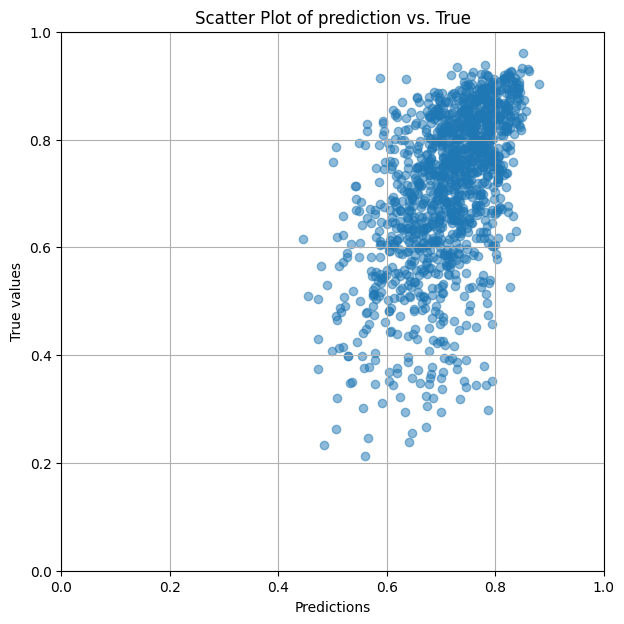

In [5]:
import matplotlib.pyplot as plt

# 예측값과 실제값의 산점도 그리기
plt.figure(figsize=(7,7))
plt.scatter(result_df['prediction'], result_df['y_True'], alpha=0.5)
plt.title('Scatter Plot of prediction vs. True')
plt.xlabel('Predictions')
plt.xlim(0,1)
plt.ylim(0,1)
plt.ylabel('True values')
plt.grid(True)
plt.show()

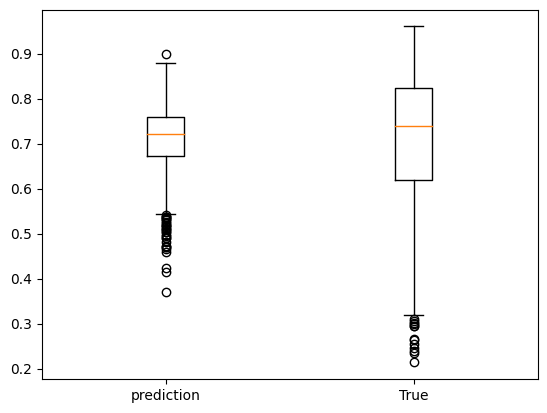

In [21]:
plt.boxplot([result_df['prediction'], result_df['y_True']], labels=['prediction', 'True'])
plt.show()

### feature selection model loss MSE->MAE 변경

In [24]:
y_valid = pd.read_csv("y_valid_mae.csv")
y_valid

,0
0,0.650768
1,0.648841
2,0.749208
3,0.657104
4,0.609168
...,...
1262,0.538806
1263,0.666633
1264,0.448878
1265,0.356847


In [25]:
y_pred = pd.read_csv("y_pred_mae.csv")
y_pred

,0
0,0.727058
1,0.624571
2,0.776628
3,0.650970
4,0.640922
...,...
1262,0.790272
1263,0.626344
1264,0.561204
1265,0.700507


In [26]:
result_df = pd.concat([y_pred, y_valid], axis=1)
result_df.columns=['prediction', 'y_True']
result_df

,prediction,y_True
0,0.727058,0.650768
1,0.624571,0.648841
2,0.776628,0.749208
3,0.650970,0.657104
4,0.640922,0.609168
...,...,...
1262,0.790272,0.538806
1263,0.626344,0.666633
1264,0.561204,0.448878
1265,0.700507,0.356847


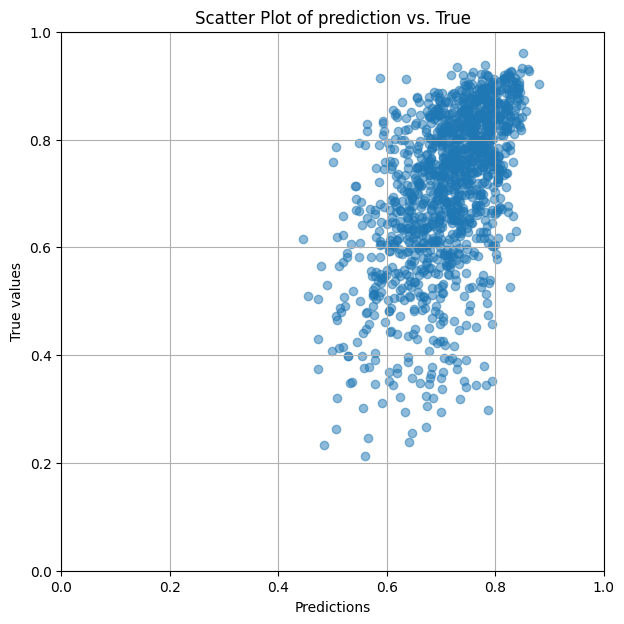

In [27]:
import matplotlib.pyplot as plt

# 예측값과 실제값의 산점도 그리기
plt.figure(figsize=(7,7))
plt.scatter(result_df['prediction'], result_df['y_True'], alpha=0.5)
plt.title('Scatter Plot of prediction vs. True')
plt.xlabel('Predictions')
plt.xlim(0,1)
plt.ylim(0,1)
plt.ylabel('True values')
plt.grid(True)
plt.show()

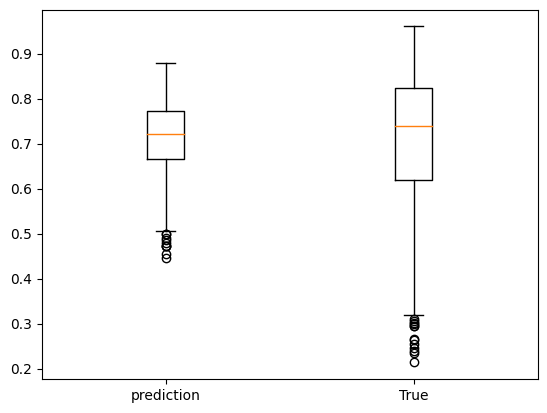

In [28]:
plt.boxplot([result_df['prediction'], result_df['y_True']], labels=['prediction', 'True'])
plt.show()

In [33]:
result_df[result_df['y_True']<0.4]

,prediction,y_True
6,0.679499,0.358323
24,0.554285,0.398458
27,0.578618,0.346239
36,0.683534,0.377879
60,0.741765,0.352427
61,0.568046,0.378458
62,0.618786,0.367033
115,0.745515,0.391445
191,0.507853,0.319608
216,0.684530,0.321178


-----

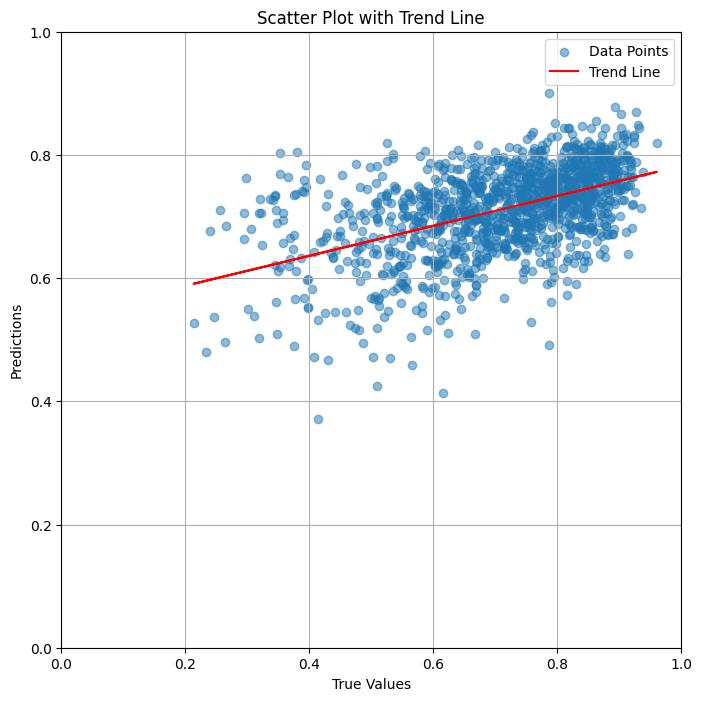

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# 예측값과 실제값의 산점도 그리기
plt.figure(figsize=(8,8))
plt.scatter(result_df['y_True'], result_df['prediction'], alpha=0.5, label='Data Points')

# 최소 제곱 회귀선 구하기
slope, intercept, r_value, p_value, std_err = linregress(result_df['y_True'], result_df['prediction'])
line = slope * result_df['y_True'] + intercept

# 산점도와 추세선 그리기
plt.plot(result_df['y_True'], line, color='red', label='Trend Line')
plt.title('Scatter Plot with Trend Line')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.grid(True)
plt.show()

In [117]:
df[df['image_file']=='val2017/000000108253.jpg']

,image_file,score,width,height,bbox_size,entropy,laplacian,brightness,B_sd,red,...,Variance,IDM,Sum_Average,Sum_Variance,Sum_Entropy,Entropy,Difference_Variance,Difference_Entropy,IMC1,IMC2
5891,val2017/000000108253.jpg,0.458938,159.89,285.64,45670.9796,6.247152,610.725185,36.961845,54.715868,58.881673,...,2970.128646,0.347092,73.481295,11674.021618,7.199663,10.011258,0.000509,3.613688,-0.395108,0.996236


In [86]:
df.loc[6252]

image_file             val2017/000000261097.jpg
score                                  0.318116
width                                     55.02
height                                    51.68
bbox_size                             2843.4336
entropy                                5.720555
laplacian                            163.328268
brightness                            32.154724
B_sd                                  41.197775
red                                   36.117291
blue                                  30.839929
green                                  30.37148
color_var                           1829.176287
contrast                                 0.9875
img_size                                 166500
edge_intensity                         9.454545
saturation                           128.172193
sift                                          1
c_moment_x                                   19
c_moment_y                                   16
bbox_prop                              0

In [90]:
df[df['image_file']=='val2017/000000235836.jpg']

,image_file,score,width,height,bbox_size,entropy,laplacian,brightness,B_sd,red,...,Variance,IDM,Sum_Average,Sum_Variance,Sum_Entropy,Entropy,Difference_Variance,Difference_Entropy,IMC1,IMC2
1073,val2017/000000235836.jpg,0.847537,155.88,325.52,50742.0576,7.833908,7134.375108,117.167782,66.719315,130.683553,...,4452.065132,0.111359,234.159876,16638.195522,8.76429,13.932019,0.000106,5.793894,-0.221378,0.984039


In [91]:
df.loc[1073]

image_file             val2017/000000235836.jpg
score                                  0.847537
width                                    155.88
height                                   325.52
bbox_size                            50742.0576
entropy                                7.833908
laplacian                           7134.375108
brightness                           117.167782
B_sd                                  66.719315
red                                  130.683553
blue                                  88.281112
green                                115.882442
color_var                           4815.079295
contrast                                    1.0
img_size                                 273280
edge_intensity                        68.782928
saturation                           107.164387
sift                                        368
c_moment_x                                   68
c_moment_y                                  165
bbox_prop                              0

In [89]:
high_score_image = result_df.tail()
high_score_image

,Image_File,Prediction,True
1262,val2017/000000568981.jpg,0.859444,0.826530
1263,val2017/000000514797.jpg,0.860600,0.638478
1264,val2017/000000006954.jpg,0.861259,0.771370
1265,val2017/000000358195.jpg,0.861821,0.925247
1266,val2017/000000235836.jpg,0.869564,0.847537


In [76]:
low_score_images_df = df[df['image_file'].isin(low_score_image)]
low_score_images_df

,image_file,score,width,height,bbox_size,entropy,laplacian,brightness,B_sd,red,...,Variance,IDM,Sum_Average,Sum_Variance,Sum_Entropy,Entropy,Difference_Variance,Difference_Entropy,IMC1,IMC2
169,val2017/000000261097.jpg,0.908766,68.42,234.89,16071.1738,7.707587,5632.484540,114.985231,68.727992,118.288399,...,4749.020024,0.124617,229.769135,17758.757122,8.658091,13.058328,0.000136,5.545191,-0.306725,0.995467
2101,val2017/000000302536.jpg,0.797244,191.29,338.76,64801.4004,7.225939,664.789012,79.155535,45.524901,83.815282,...,2077.214728,0.314551,158.273235,8138.834158,8.202913,11.580335,0.000469,3.795877,-0.397259,0.998260
2395,val2017/000000261097.jpg,0.782902,35.81,54.08,1936.6048,7.177503,6429.404749,69.077778,58.256119,69.676190,...,3403.655214,0.115744,138.865931,12058.952763,8.001421,11.030027,0.000116,5.753313,-0.465689,0.999380
2667,val2017/000000224337.jpg,0.767897,365.45,425.08,155345.4860,7.169568,1399.375193,115.896013,46.219886,137.365383,...,2131.799901,0.136438,231.770854,8298.048268,8.124660,12.591267,0.000171,4.789009,-0.243195,0.984315
3607,val2017/000000226154.jpg,0.716281,63.03,54.61,3442.0683,5.024753,439.609004,46.585538,10.942122,44.232804,...,116.701020,0.296460,93.103011,381.812724,5.890432,8.955983,0.000683,3.656858,-0.214199,0.937375
5519,val2017/000000224337.jpg,0.542796,50.65,119.02,6028.3630,6.835039,248.742542,55.969916,30.478651,64.737983,...,914.326071,0.207190,110.860352,3616.287570,7.787066,11.091955,0.000497,3.763773,-0.374154,0.996883
5646,val2017/000000224337.jpg,0.516709,199.06,211.87,42174.8422,4.425014,368.339844,25.271333,44.239809,26.550692,...,1950.441806,0.613553,50.290532,7727.337876,5.000282,6.715354,0.001371,2.816596,-0.479061,0.992592
5797,val2017/000000226662.jpg,0.486862,51.55,197.50,10181.1250,5.887363,46.340246,30.268140,32.936393,30.268140,...,1065.251220,0.389742,59.820776,4221.727385,6.812641,9.293893,0.000918,3.317684,-0.415061,0.995468
5973,val2017/000000224337.jpg,0.431109,84.34,144.04,12148.3336,5.903501,384.155218,32.263393,34.450616,28.769676,...,1160.989553,0.425839,63.917832,4569.287821,6.697196,9.110923,0.000658,3.384736,-0.452788,0.997516
6079,val2017/000000226662.jpg,0.395035,78.84,203.56,16048.6704,6.591112,139.649479,44.703234,41.074836,44.703234,...,1686.743058,0.322142,89.672440,6672.159134,7.555094,10.491789,0.000491,3.736913,-0.407414,0.997452


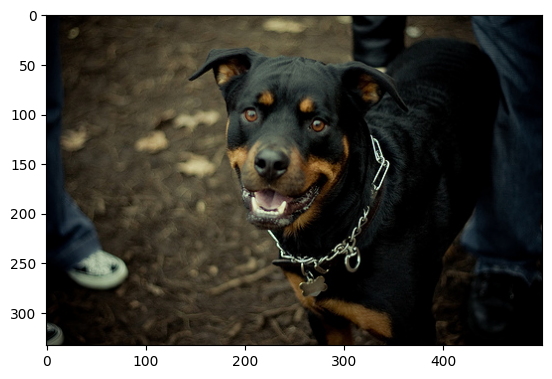

In [121]:
#low score
import cv2
img = cv2.imread('val2017/000000253386.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)

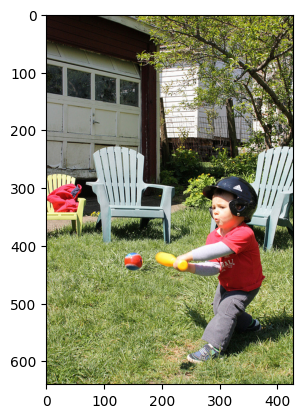

In [98]:
#high score
img = cv2.imread('val2017/000000235836.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)

### 낮은 score의 이미지 예시

In [ ]:
bbox_df = pd.read_csv("df_0103_added_bbox.csv")
bbox_df.columns

Index(['image_file', 'score', 'width', 'height', 'bbox_size', 'entropy',
       'laplacian', 'brightness', 'B_sd', 'red', 'blue', 'green', 'color_var',
       'contrast', 'img_size', 'edge_intensity', 'saturation', 'sift', 'psnr',
       'centroid_l', 'c_moment_x', 'c_moment_y', 'bbox_prop', 'ASM',
       'Contrast', 'Correlation', 'Variance', 'IDM', 'Sum_Average',
       'Sum_Variance', 'Sum_Entropy', 'Entropy', 'Difference_Variance',
       'Difference_Entropy', 'IMC1', 'IMC2', 'bbox'],
      dtype='object')

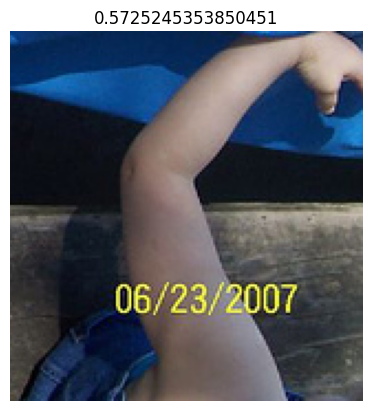

In [ ]:
import ast
import random

low_score = bbox_df[bbox_df['score']<0.6]
ex = low_score.iloc[random.randrange(len(low_score))]
ex_title = ex['score']
x, y, w, h = map(int, ast.literal_eval(ex['bbox']))
img = cv2.imread(ex['image_file'])
cropped_image = img[y:y+h, x:x+w]
img = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2BGR)
plt.axis("off")
plt.title(ex_title)
plt.imshow(img)

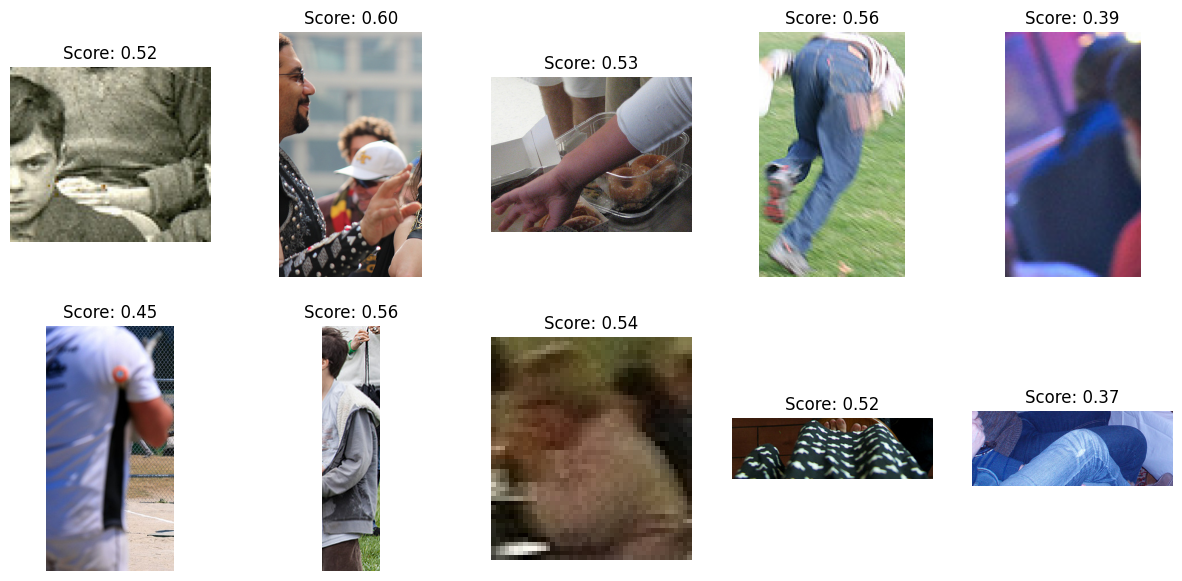

In [ ]:
# low_score 데이터프레임에서 랜덤하게 10개의 샘플 선택
random_samples = low_score.sample(n=10, random_state=0)

# 10개의 샘플에 대해 이미지 출력
plt.figure(figsize=(15, 7))
for i, (_, ex) in enumerate(random_samples.iterrows(), 1):
    plt.subplot(2, 5, i)
    
    x, y, w, h = map(int, ast.literal_eval(ex['bbox']))
    img = cv2.imread(ex['image_file'])
    cropped_image = img[y:y+h, x:x+w]
    img = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2BGR)
    
    plt.axis("off")
    plt.title(f"Score: {ex['score']:.2f}")
    plt.imshow(img)

plt.show()